<a href="https://colab.research.google.com/github/HarryPrajapati/Students-Performance-in-Exams-Data-Scince-with-Python-/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [0]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))

In [0]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
df.describe()



,mathscore,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:

df.shape

(1000, 8)

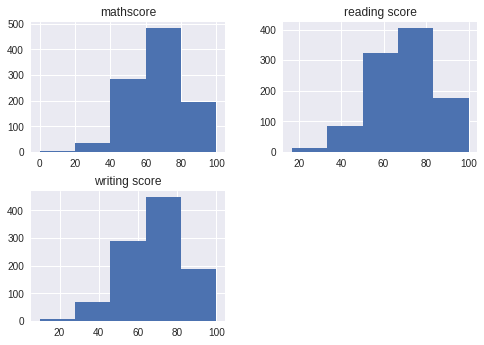

In [0]:
hist = df.hist(bins=5)

In [0]:
df.corr()

,mathscore,reading score,writing score
mathscore,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


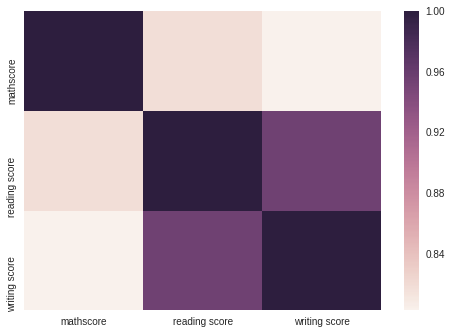

In [0]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [0]:
df.isnull().sum().sum()

0

In [0]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
mathscore                      0
reading score                  0
writing score                  0
dtype: int64

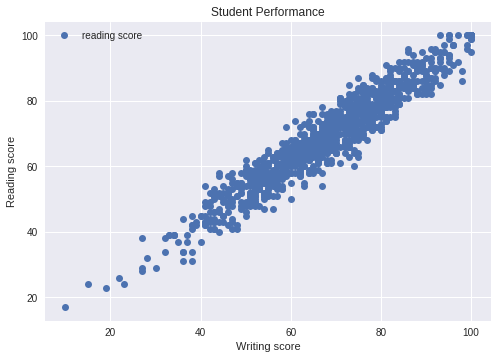

In [0]:
df.plot(x='writing score', y='reading score', style='o')  
plt.title('Student Performance')  
plt.xlabel('Writing score')  
plt.ylabel('Reading score')  
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


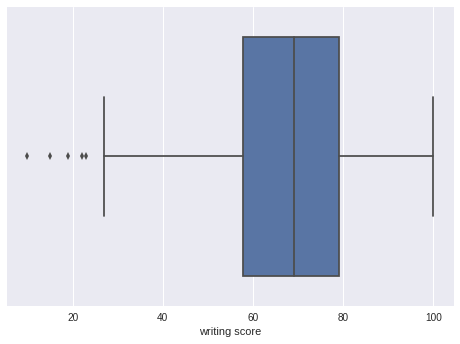

In [0]:
import seaborn as sns
sns.boxplot(x=df['writing score'])


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


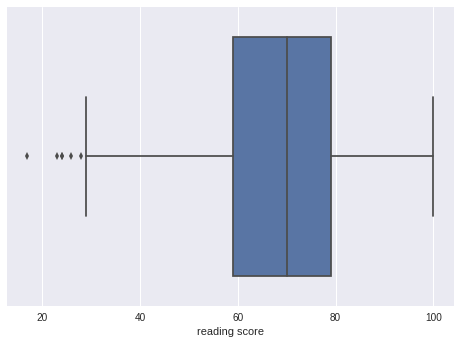

In [0]:

sns.boxplot(x=df['reading score'])

In [0]:
x = df.iloc[:, 5:8].values
y = df.iloc[:,1].values


In [0]:
LE=LabelEncoder()
y=LE.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=2)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [0]:
y_pred=classifier.predict(x_test)

In [0]:
score = classifier.score(x_test,y_test)

In [0]:

score

0.26

In [0]:
###Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


In [0]:
clf.score(x_test,y_test)


0.255

In [0]:
######Logistic regression 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression ()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
classifier.score(x_test,y_test)

0.31

In [1]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(x_test,y_test)
y_pred = clf.predict(x_test)


NameError: ignored

In [0]:
clf.score(x_test,y_test)

0.41